In [33]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import os
from scipy.stats import norm , cauchy

In [2]:
def ang_dist(X, eta):
    theta1,phi1,theta2,phi2=X
    n1x = np.sin(theta1)*np.cos(phi1);
    n1y = np.sin(theta1)*np.sin(phi1);
    n1z = np.cos(theta1);
    n2x = np.sin(theta2)*np.cos(phi2);
    n2y = np.sin(theta2)*np.sin(phi2);
    n2z = np.cos(theta2);
    return 3+0.461+(0.750*(-0.750))*((1-0.461)*(np.cos(eta)*(n1x*n2x-n1y*n2y)-np.sin(eta)*(n1y*n2x-n1x*n2y)-(1+3*0.461)*n1z*n2z))

In [4]:
p0 = [0.]
eta_val = []
for i in range(100):
    theta1,phi1,theta2,phi2,y_val = np.loadtxt("angles/"+str(i+1)+".csv", dtype=float, delimiter=',', unpack =True)
    parameters,cov=curve_fit(ang_dist, (theta1,phi1,theta2,phi2), y_val, p0)
    eta_val.append(parameters)
    print(str(i+1)+"% complete: "+str(parameters))
    os.remove("angles/"+str(i+1)+".csv")

1% complete: [5.53160713e-06]
2% complete: [0.0002824]
3% complete: [-0.00026143]
4% complete: [-0.00014375]
5% complete: [0.00051678]
6% complete: [-2.90116409e-05]
7% complete: [-0.0002067]
8% complete: [0.00042874]
9% complete: [0.00069968]
10% complete: [3.38891731e-05]
11% complete: [4.17536239e-05]
12% complete: [-0.00036396]
13% complete: [0.00075591]
14% complete: [0.00014641]
15% complete: [-0.00023534]
16% complete: [-0.00058553]
17% complete: [-0.00056415]
18% complete: [-0.0005672]
19% complete: [0.0008518]
20% complete: [-0.00019582]
21% complete: [0.00052311]
22% complete: [0.00153317]
23% complete: [2.63976374e-05]
24% complete: [9.11705638e-05]
25% complete: [8.80913672e-05]
26% complete: [0.00029782]
27% complete: [7.82724969e-05]
28% complete: [-0.00012111]
29% complete: [0.00018239]
30% complete: [-0.00036084]
31% complete: [0.0003866]
32% complete: [-0.00039705]
33% complete: [-0.00050489]
34% complete: [7.39216803e-05]
35% complete: [0.00021335]
36% complete: [0.00

In [19]:
p0 = [0.]
for i in range(100):
    theta1,phi1,theta2,phi2,y_val = np.loadtxt("angles/"+str(i+1)+".csv", dtype=float, delimiter=',', unpack =True)
    parameters,cov=curve_fit(ang_dist, (theta1,phi1,theta2,phi2), y_val, p0)
    eta_val.append(parameters)
    print(str(i+1)+"% complete: "+str(parameters))
    os.remove("angles/"+str(i+1)+".csv")

1% complete: [0.00041823]
2% complete: [0.00029735]
3% complete: [-0.00018306]
4% complete: [-0.00019349]
5% complete: [7.49354724e-05]
6% complete: [0.00044927]
7% complete: [-1.60588524e-05]
8% complete: [-0.0001412]
9% complete: [-0.00041108]
10% complete: [1.49990612e-05]
11% complete: [0.00019348]
12% complete: [0.00012673]
13% complete: [-8.38583654e-05]
14% complete: [-0.00056599]
15% complete: [-0.00085823]
16% complete: [-0.00044606]
17% complete: [0.00052872]
18% complete: [6.84112705e-05]
19% complete: [0.00080475]
20% complete: [-0.00070654]
21% complete: [0.00042576]
22% complete: [0.000729]
23% complete: [-0.00014605]
24% complete: [0.00065426]
25% complete: [0.00035631]
26% complete: [-0.00070915]
27% complete: [-0.00020022]
28% complete: [-0.0003328]
29% complete: [0.00037582]
30% complete: [-8.0643703e-05]
31% complete: [0.00016167]
32% complete: [-0.00013979]
33% complete: [-0.00046027]
34% complete: [3.22907386e-05]
35% complete: [0.00011828]
36% complete: [-0.000607

In [29]:
eta_hist = []
for i in range(200):
    eta_hist.append(eta_val[i][0])

In [30]:
eta_val[199][0]

-0.00021199329864461734

(array([ 2.,  5., 26., 33., 59., 37., 25., 12.,  0.,  1.]),
 array([-0.00130993, -0.00102562, -0.00074131, -0.000457  , -0.00017269,
         0.00011162,  0.00039593,  0.00068024,  0.00096455,  0.00124886,
         0.00153317]),
 <BarContainer object of 10 artists>)

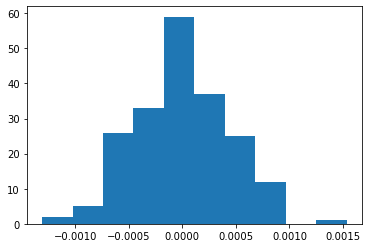

(array([ 1.,  0., 12., 25., 37., 59., 33., 26.,  5.,  2.]),
 array([-2.98459877e-05, -2.43113661e-05, -1.87767444e-05, -1.32421227e-05,
        -7.70750097e-06, -2.17287928e-06,  3.36174242e-06,  8.89636411e-06,
         1.44309858e-05,  1.99656075e-05,  2.55002292e-05]),
 <BarContainer object of 10 artists>)

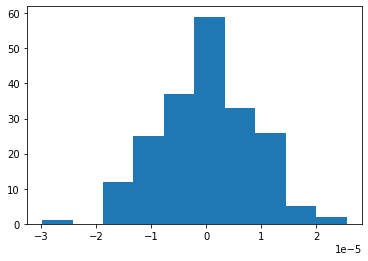

In [38]:
plt.hist(2/9*(1-0.461)/(3+0.461)*0.750*(-0.750)*np.sin(eta_hist))

FIT PARAMETERS:	mu = -2.0377748313215752e-08 	sigma = 8.417195101275829e-06


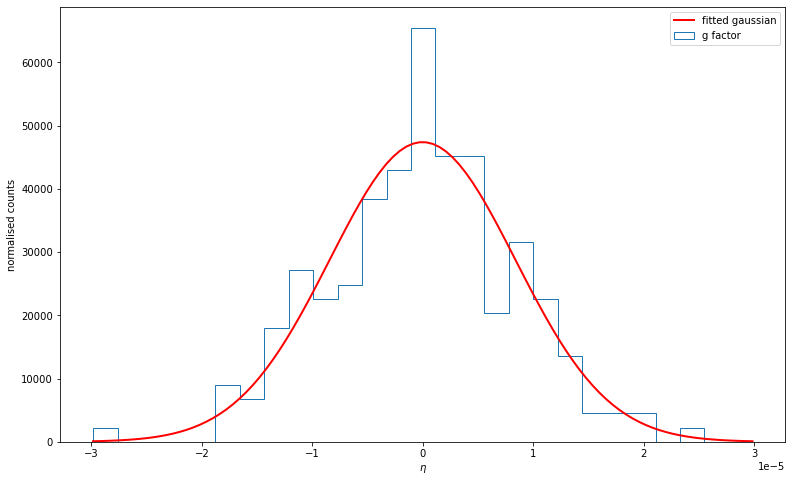

In [42]:
s = 2/9*(1-0.461)/(3+0.461)*0.750*(-0.750)*np.sin(eta_hist)
fig, ax = plt.subplots(1,1 , figsize=(13,8))
ax.hist(s,bins=25,histtype='step',density=True,label='g factor')
mu, std = norm.fit(s)
x = np.linspace(min(s), 0-min(s), 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, color='red', linewidth=2, label='fitted gaussian')
print('FIT PARAMETERS:\tmu =', mu, '\tsigma =', std)
ax.set_xlabel('$\eta$')
ax.set_ylabel('normalised counts')
ax.legend()
fig.savefig('gaussian_g_not_d.svg', format='svg', dpi=1200)

In [43]:
std/(2.2*10**(-4))

0.038259977733071944